<div id="toggle_code">...</div>
<script src="https://ajax.googleapis.com/ajax/libs/jquery/3.5.1/jquery.min.js"></script>
<script src="https://cdn.jsdelivr.net/gh/philipwlewis/jupyterlab-toc-toggle@1.0/jlab-toc-toggle.js"></script>

<style>
.jlab-table td { 
    border: 1px solid black  !important;
    text-align: center !important;
    background: white !important;
}
.jlab-table table { 
    background: white !important;
    margin: 1em auto 1em auto !important;
    text-align: center !important;
    border-collapse: collapse  !important;
    border: 1px solid black  !important;
}
.jlab-table th { 
    border: 1px solid black  !important;
    text-align: center !important;
    background: aliceblue !important;
}

</style>


# Interconnected Minds: A Comparative Study of Memory, Mathematics, and ANS Across Genders

## Introduction

Approximate number system (ANS) refers to the innate cognitive ability to discriminate magnitudes without the assistance of language or symbol cues ([Nelwan et al., 2022](#Nelwan-2022)). It has long been suspected at the base of complicated arithmetical processing and analysis, which is supported by the positive correlation between Dyscalculia (impaired maths ability) and poorer ANS acuity ([Piazza et al., 2010](#Piazza-2010)). However, counterarguments were raised as other studies have failed to detect any relationships between ANS and maths skills ([Starr and Brannon, 2015](#Starr-2015)). Furthermore, it is believed that other cognitive abilities such as memory proficiency also influence mathematic performances, which may act in a parallel or intertwined manner with ANS acuity. Therefore, investigations into the relationships between ANS, maths and memory abilities are necessary for understanding the complex interplay between cognitive domains, which may provide insights into the causation of Dyscalculia. Here, a quantitative social study was conducted to explore whether more precise ANS acuity correlates with greater maths and memory abilities. Additionally, gender differences in cognitive ability in these three domains were assessed.

## Methods

Three online tests were coded to quantitatively reflect subjects’ cognitive abilities—ANS, memory and maths tests. All tests were user-intuitive and clearly instructed to avoid bias in test results due to misunderstandings of test procedures. All participants were asked to complete all questions in three tests, and their scores equivalated to the number of correct answers. This marking scheme was kept consistent across three tests to ensure the validity of comparative data analysis. Initially, 15 sets of data were collected to ensure the fairness and uniformity of the test design. Subsequently, 38 participants’ results were recollected for testing hypotheses A and B (as discussed below). Most test-takers were UCL students, especially those enrolled in BIOS0030, and undergraduates from other universities.

## ANS Test Design

The ANS test asks participants to identify the side with the most dots after the image blinks. Two groups of dots will be displayed for 0.75 seconds, followed by “left” and “right” buttons appearing on screens for participants to click on. There are 48 questions separated into three levels with increasing complexity since the dot ratio between the two sides in higher levels is smaller. All questions were randomized in a reproducible manner to minimize potential bias associated with question order, contributing to the fairness and reliability of the assessment outcomes. 

Example Question:

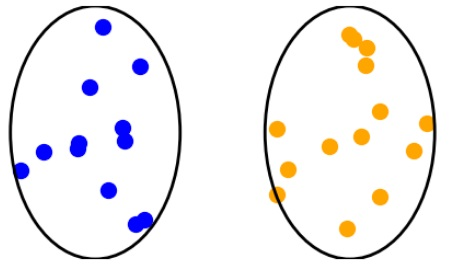


## Maths Test Design 

The maths test asks participants to input answers for basic calculations involving addition, subtraction, multiplication, and division. To control for the effect of memory capacity on calculation performance, each number is displayed for two seconds, with no sum of digits exceeding 7, which was indicated as the limit of memory span ([Miller, 1956](#Miller-1956)). The number of correct answers is collected, and faster responses will be assigned a higher score through a different metric that will not be investigated in this report. 

Example questions:

Level 1: $4-2-3 =?$

Level 2: $7+13ⅹ12 =?$

Level 3: $18ⅹ18÷4 =?$

## Memory Test Design

The memory test asks participants to answer MCQs after an image is displayed for 20 seconds. To avoid distributional bias in scoring due to oversimplified questions, participants are expected to memorize a grid of multicoloured shapes. This approach encompasses both visual and spatial memorization, facilitating a comprehensive evaluation of memory ability. Additionally, this test deliberately removes the time limit to exclude the stress-induced impairment of memory ability due to time pressure ([Vogel & Schwabe, 2016](#Vogel-2016)). Therefore, the test length was adjusted mainly based on user feedback. Furthermore, user input is facilitated through clickable buttons to preclude data inaccuracy raised from misspellings.

Example Question:

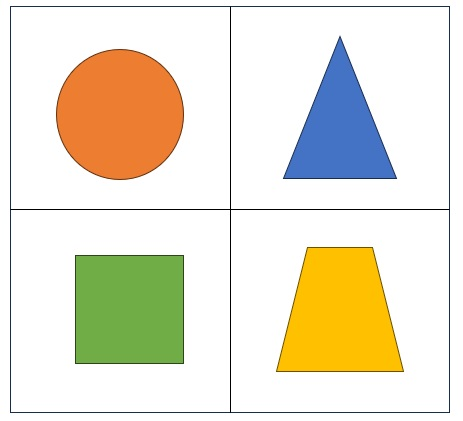


## Results

Assessment of Bias in Question Difficulty

To ensure no bias in difficulty amongst even and odd-numbered questions, the correct rate for both was collected using 15 sets of data. As illustrated in Figure 1, t-tests were carried out with a p-value smaller than 0.05, showing no significant difference between correct rates for odd or even-numbered questions.


In [ ]:
#Hypothesis A figures

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress, ttest_ind
from tabulate import tabulate

#Table showing the results of three tests measuring correlation between ANS and the other cognitive tests (using the Spearman rank-order method)
#e.g. two columns: measured correlation value and significance (p-value), three rows for each of the tests (ANS vs maths, ANS vs correlation, ANS vs spatial reasoning).

#first, we need to identify if there are any outliers before we graph histograms showing distribution
#Here, we use Statistical Methods,  IQR
ans= pd.read_csv("ANS test.csv")
math= pd.read_csv("maths data.csv")
memory= pd.read_csv("memory_test.csv")

def outlier (column):
    q1, q3 = np.percentile(column, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column = column[(column >= lower_bound) & (column <= upper_bound)]
    return column
            
math["score"] = outlier(math["correct_answers"])
math = math.dropna(subset=["score"])
ans["score"] = outlier(ans["Correct response"])
ans = ans.dropna(subset=["score"])
memory["score"] = outlier(memory["n_correct_answers"])
memory = memory.dropna(subset=["score"])

#Since there are no outliers, we proceed to graph histograms showing distribution of correct answers
#I want to create a plot with 3 histograms in a row to make it clearer
fig, ax = plt.subplots(1,3, figsize=(15, 5))
ANS_srt = ans[["User id", "score"]].set_index("User id")
ax[0].hist(ANS_srt, bins = 10, edgecolor='black')
ax[0].set_xlabel("Number of Correct Answers in ANS Test")
ax[0].set_xticks(np.arange(20, 46, step=5))
ax[0].set_ylabel("Number of Students")
ax[0].set_title("Histogram of Correct Answers (out of 48)")
memory_srt = memory[["ID", "score"]].set_index("ID")
ax[1].hist(memory_srt, bins = 10, edgecolor='black')
ax[1].set_xlabel("Number of Correct Answers in Memory Test")
ax[1].set_xticks(np.arange(10, 25, step=2))
ax[1].set_ylabel("Number of Students")
ax[1].set_title("Histogram of Correct Answers (out of 29)")
math_srt = math[["user_id", "score"]].set_index("user_id")
ax[2].hist(math_srt, bins = 10, edgecolor='black')
ax[2].set_xlabel("Number of Correct Answers in Math Test")
ax[2].set_xticks(np.arange(6, 15, step=2))
ax[2].set_ylabel("Number of Students")
ax[2].set_title("Histogram of Correct Answers (out of 15)")

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'ANS test.csv'

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
ANS_merged_memory = ANS_srt.merge(memory_srt, left_index=True, right_index=True)
ANS_merged_math = ANS_srt.merge(math_srt, left_index=True, right_index=True)
ax[0].scatter(ANS_merged_memory["score_x"], ANS_merged_memory["score_y"])
ax[0].set_xlabel("ANS score")
ax[0].set_ylabel("Memory score")
ax[0].set_title("Scatter plot of ANS vs. Memory")
ax[1].scatter(ANS_merged_math["score_x"], ANS_merged_math["score_y"])
ax[1].set_xlabel("ANS score")
ax[1].set_ylabel("Math score")
ax[1].set_title("Scatter plot of ANS vs. Math")
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(ANS_merged_memory["score_x"], ANS_merged_memory["score_y"])
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(ANS_merged_math["score_x"], ANS_merged_math["score_y"])


# to draw line we take x values at each end of the plot
x0 = 12
x1 = 45

# then use eqn to find corresponding y-values
y0 = x0*slope1+intercept1
y1 = x1*slope1+intercept1

# we can now plot a line from (x0,y0) to (x1,y1)
ax[0].text(12,24, f"Fit: [memory_score]={slope1:.3g}*[ANS_score] + {intercept1:.3g}")
lines = ax[0].plot([x0,x1],[y0,y1],'r-')

y0 = x0*slope2+intercept2
y1 = x1*slope2+intercept2

# we can now plot a line from (x0,y0) to (x1,y1)
ax[1].text(12,14, f"Fit: [math_score]={slope2:.3g}*[ANS_score] + {intercept2:.3g}")
lines = ax[1].plot([x0,x1],[y0,y1],'r-')

In [ ]:
#data analysis
rsquared1 = rvalue1*rvalue1
rsquared2 = rvalue2*rvalue2
dic1 = {"":["ANS vs. Memory", "ANS vs. Math"],
          "R-squared value":[f"{rsquared1:.3g}", f"{rsquared2:.3g}"],
          "P-value":[f"{pvalue1:.3g}", f"{pvalue2:.3g}"]}
df = pd.DataFrame(dic1).set_index("")
df

In [ ]:
def t_test(new_df, ID):
    mean_score_individual = []
    row_num = 0

    for correct_answer in new_df["Correct"]:
        scores = []
        for col in new_df.columns[:-1]:  # Exclude the "Correct" column
            # Compare the answer for each row (question) with the correct answer
            if new_df[col].iloc[row_num] == correct_answer:
                scores.append(1)
            else:
                scores.append(0)
        mean_score_individual.append(sum(scores)/len(ID))

    new_df["mean_score_individual"] = mean_score_individual

    even_num_result = new_df1["mean_score_individual"].iloc[1::2]
    odd_num_result = new_df1["mean_score_individual"].iloc[0::2]

    p_value= ttest_ind(even_num_result, odd_num_result).pvalue
    
    return p_value

def dotplot(new_df):
    fig, ax = plt.subplots() 

    index_label = []
    for i in new_df.index:
        if (i) % 2 != 0:
            index_label.append("odd")
        else:
            index_label.append("even")

    df_4_plot = pd.DataFrame({ 'index_label': index_label, 'ind_ave': new_df["mean_score_individual"] } )

    ax.plot(df_4_plot['index_label'],df_4_plot["ind_ave"],'o')
    ax.set_xlim(-1,2)

    odd_df = df_4_plot.query( "index_label=='odd'" )
    even_df = df_4_plot.query( "index_label=='even'" )

    odd_mean = odd_df['ind_ave'].mean()
    odd_std_err = stats.sem(odd_df['ind_ave'])

    even_mean = even_df['ind_ave'].mean()
    even_std_err = stats.sem(even_df['ind_ave'])

    ax.errorbar('odd',odd_mean,  yerr=odd_std_err,  marker='_',  color='black')
    ax.errorbar('even',even_mean,  yerr=even_std_err,  marker='_',  color='black')
    ax.set_xlabel(f"P-value for t-test is {p_value:.3g}",color='blue', fontsize='large', labelpad=20)
    ax.set_ylabel("Correct rate of individual questions")
    ax.set_title("Memory Test Average Scores of Odd-numbered vs Even-numbered Questions")

    plt.show()
    return

df1 = pd.read_csv("memory_individual.csv")
#extract the user_answer column and split these strings of answers into a series of lists.
user_answers = df1['user_answer'].str.split(', ')
#create a new dataframe by setting the index label as ID and column label as question number
#fill the user_answer to the new dataframe as rows. The user_answer is series.
#When call .tolist() on this Series, it converts the Series itself into a list. Since each element of the Series is already a list, the result is a list of lists.
#flip the index and columns for easier manipulations later
new_df1 = pd.DataFrame(user_answers.tolist(), index=df1['ID'], columns=range(1, 30)).transpose()
new_df1["Correct"] = ["a", "b", "b", "a", "c", "b", "b", "a","b","a","c","b","b", "a", "b", "c", "a","b","b","c", "b", "c", "b", "a", "c","b", "b","c", "b"]

p_value = t_test(new_df1, df1['ID'])

dotplot_memory = dotplot(new_df1)
print(new_df1["mean_score_individual"])

In [ ]:
#Hypothesis B Figures

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

def which_csv(text_index):
    
    if text_index== 0:
        test_type= "ANS"
        csv_file= "ans data.csv"
        correct_answers= "Correct response"
            
    elif text_index== 1:
        test_type= "Maths"
        csv_file= "maths data.csv"
        correct_answers= "correct_answers"

    elif text_index== 2:
        test_type= "Memory"
        csv_file= "memory data.csv"
        correct_answers= "n_correct_answers"

    dataframe= pd.read_csv(csv_file)
    correct_answers_name = dataframe[correct_answers]
    
    return dataframe, test_type, correct_answers, correct_answers_name

def outlier (correct_answers):
    q1, q3= np.percentile(correct_answers, [25, 75])
    iqr= q3- q1
    lower_bound= q1- 1.5* iqr
    upper_bound= q3+ 1.5* iqr
    correct_answers= correct_answers[(correct_answers>= lower_bound)& (correct_answers<= upper_bound)]
    
    return correct_answers
        
def create_gender_boxplots():

    for test_index in range (3):
        dataframe, test_type, correct_answers, correct_answers_name= which_csv(test_index)
        
        # Data is sorted.   
        female_dataframe= dataframe[dataframe["gender"]== "f"]
        male_dataframe= dataframe[dataframe["gender"]== "m"]

        # Graph is plotted.
        fig, ax= plt.subplots()
        ax.boxplot([female_dataframe[correct_answers], male_dataframe[correct_answers]])
        ax.set_xlabel("Gender")
        ax.set_ylabel(f"Number of Correct Answers in {test_type} Test")
        ax.set_xticklabels(["Female", "Male"])
        ax.set_title(f"Spread of Correct Answers of Male and Female {test_type} Test Takers")
        plt.show()    
   
def t_test_between_genders():
    
    t_test_table= {
        "Test": [],
        "Mean score male": [],
        "Male standard error": [],
        "Mean score female": [],
        "Female standard error": [],
        "Difference in score": [],
        "P value": []
    }
    
    for test_index in range (3):
        dataframe, test_type, correct_answers, correct_answers_name= which_csv(test_index)
        dataframe["score"]= outlier(correct_answers_name)
        dataframe= dataframe.dropna(subset=["score"])
        
        # Layout is similar to the above function.    
        female_dataframe= dataframe[dataframe["gender"]== "f"]
        male_dataframe= dataframe[dataframe["gender"]== "m"]
        female_mean= female_dataframe[correct_answers].mean()
        male_mean= male_dataframe[correct_answers].mean()
        difference= female_mean- male_mean
        female_se= stats.sem(female_dataframe[correct_answers])
        male_se= stats.sem(male_dataframe[correct_answers])
        t_test= stats.ttest_ind(female_dataframe[correct_answers].values, male_dataframe[correct_answers].values)
        print(f"{test_type} Test p value is {t_test.pvalue}.")
    
        if t_test.pvalue<= 0.05:
            print("Result is significant a the 0.05 level.")
        
        else:
            print("The result is not significant and we fail to detect a difference in means at the 0.05 level.")

        # Table for t-test information is made.
        t_test_table["Test"].append(test_type)
        t_test_table["Mean score male"].append(f"{male_mean: .3g}")
        t_test_table["Male standard error"].append(f"{male_se: .3g}")
        t_test_table["Mean score female"].append(f"{female_mean: .3g}")
        t_test_table["Female standard error"].append(f"{female_se: .3g}")
        t_test_table["Difference in score"].append(f"{difference: .3g}")
        t_test_table["P value"].append(f"{t_test.pvalue: .3g}")
        t_test_table_df= pd.DataFrame(t_test_table)
        final_table= t_test_table_df.pivot_table(values= ["Mean score male", "Male standard error", "Mean score female", "Female standard error", "Difference in score", "P value"], index= "Test")
            
        # Dot plot for t-test is created.        
        fig = plt.figure()
        ax = fig.add_subplot()
        ax.plot(female_dataframe["gender"], female_dataframe[correct_answers], "o", alpha= 0.3, color= "red")
        ax.plot(male_dataframe["gender"], male_dataframe[correct_answers], "o", alpha= 0.3, color= "blue")
        ax.errorbar("f", female_mean,  yerr= female_se,  marker= "_",  color= "black")
        ax.errorbar("m", male_mean,  yerr= male_se,  marker= "_",  color= "black")
        ax.set_xlim(-1, 2)
        ax.set_ylabel("Number of correct answers")
        ax.set_xlabel("Gender")
        ax.set_title(f"Number of Correct Answers in {test_type} Test of Males vs Females")
        plt.show()
        
        if test_index== 2:
            display(final_table)

def t_test_odd_even():

    test_type= "Maths"
    csv_file= "more maths data.csv"
    dataframe= pd.read_csv(csv_file)
    empty_ia = pd.DataFrame()
    empty_ia["question_number"]= ""
    empty_ia_columns= []

    # There are 15 sets of data. The cell that contains the accuracy of each answer is collected using .iloc.
    # However it is in a dictionary format, so it is converted and placed in the dataframe empty_ia.
    # Conveniently there are also 15 questions, so numbering each row and naming each column can be done in the same loop.
    # Since default indexxing starts with 0, a separate column called question_number is created to avoid confusion.
    for i in range (15):
        individual_answers= dataframe.iloc[i ,5]
        ia= pd.read_json(individual_answers)
        empty_ia[i]= ia["correct_answer"]
        empty_ia.loc[i, "question_number"]= i+1
        empty_ia_columns.append(dataframe.iloc[i, 1])
        
    
    empty_ia= empty_ia.sort_values("question_number")
    empty_ia= empty_ia.set_index("question_number")   
    empty_ia.columns= empty_ia_columns
    
    # empty_ia data is split into 2 dataframes, depending on whether the question number is even or odd.
    odd_questions= pd.DataFrame()
    even_questions= pd.DataFrame()
    all_answers= [even_questions, odd_questions]

    for i in range(15):
        
        if i% 2== 0:
            even_questions= pd.concat([even_questions, empty_ia.iloc[i-1:i]])

        else:
            odd_questions= pd.concat([odd_questions, empty_ia.iloc[i-1:i]])
            
    # The number of total correct answers of the 2 dataframes are summed over 2 steps and divided by 15 for the mean.
    odd_questions["correct_answers_per_question"]= odd_questions[empty_ia_columns].sum(axis= 1)
    sum_odd= odd_questions["correct_answers_per_question"].sum()
    even_questions["correct_answers_per_question"]= even_questions[empty_ia_columns].sum(axis= 1)
    sum_even= even_questions["correct_answers_per_question"].sum()
    odd_questions["mean_odd"]= odd_questions["correct_answers_per_question"]/ 15
    even_questions["mean_even"]= even_questions["correct_answers_per_question"]/ 15
    mean_odd= sum_odd/ 15
    mean_even= sum_even/ 15
    print(f"The mean number of odd numbered questions answered correctly is {mean_odd}.") 
    print(f"The mean number of even numbered questions answered correctly is {mean_even}.")
    t_test= stats.ttest_ind(odd_questions["mean_odd"], even_questions["mean_even"])
    print(f"The p value of the t test is {t_test.pvalue}")
    if t_test.pvalue<= 0.05:
        print("Result is significant a the 0.05 level.")
        
    else:
        print("The result is not significant and we fail to detect a difference in means at the 0.05 level.")

In [ ]:
create_gender_boxplots()

In [ ]:
t_test_between_genders()

In [ ]:
t_test_odd_even()

## Discussion

### Hypothesis A: Is there a correlation between ANS and maths, or memory skills?

This hypothesis was examined through linear regressing ANS scores against maths or memory test scores. Considering that outliers can pull regression lines away from the central trend of data, an outlier function was defined first to remove them based on the interquartile range. From Figure x-y, it is concluded that memory and ANS skills are highly correlated while the correlation between ANS and math ability is not significant in our case. The strong correlation is supported by the R-squared value of 0.707, indicating that approximately 70.7% of the variance in the memory scores can be predicted from the ANS scores. This is further substantiated by its associated p-value under 0.05, suggesting the extremely low probability of this correlation occurring by chance. The opposite is true for ANS vs. math. 

However, the histograms showing various types of score distribution entail unmatched test difficulty, which can lead to violations of linear regression assumptions and thereby compromise its reliability. In Figure x-y, there are three types of distributions—right-skewed for ANS, normal for memory and bimodal for maths. The right-skewed distribution implies that the ANS test is easier than others, suggesting unequal variance in scores across three tests. This conflicts with the assumption of homoscedasticity, potentially resulting in inflated or deflated R-squared values and impairing the predictive accuracy of the regression model. 

Nonetheless, our conclusion aligns with existing literature that indicates little influence of advanced maths skills on ANS acuity ([Castronovo and Göbel, 2012](#Castronovo-2012)). This contradicts Toll et al.’s work revealing ANS ability as a predictor for mathematical performance in first grade ([Toll et al., 2016](#Toll-2016)). However, to reach a more scientific comparison between the study results, our study requires an expanded and varied sample, potentially including participants ranging from undergraduate to doctoral levels. Such diversification would extend the mathematical skill range within the sample, thereby augmenting the predictive power and generalizability of our regression models.

### Hypothesis B: Gender: Can we detect any significant difference between the scores of males and females across our cognitive tests?

From Table x, three t-tests were performed for all cognitive tests, which all yielded p-values greater than 0.05. This means we failed to reject the null hypothesis stating there is no significant difference between male and female scores in our ANS, maths or memory tests. The same conclusion was drawn from observing box plots (Figure x-y), which exhibited consistently similar median and interquartile ranges between genders in each test. Nevertheless, it is still worth questioning the validity of t-test results since the dot plots exhibit an unequal spread of data points between males and females, suggesting a possible violation of the t-test assumption on equal variance. 

Our findings corroborate those presented by [Weiss et al. (2003)](#Weiss-2003) in their sociological investigation, which revealed high overlaps of female and male performance in neuropsychological tests. However, Weiss et al. employed a more fortified technique—the Mann–Whitney U test. This non-parametric test eschewed the necessity of normal distribution and homogeneity of variance. Adoption of this technique in subsequent investigations could enhance the robustness of our data analysis, accommodating for non-normally distributed data.

## Summary and Outlook

In conclusion, our study demonstrated that ANS acuity positively correlates with memory ability and further substantiated gender indifference in cognitive functions. These built the groundwork for future investigations to elucidate the intricate relationships among ANS, mathematics, and memory. Future studies will utilize larger and more diverse samples, alongside advanced analytical methodologies, to yield more robust results. Additionally, integrating neuroscientific approaches may clarify ANS's foundational role in mathematical skills, a key aspect in the exploration of Dyscalculia.


## Bibliography
1. <a name="Nelwan-2022"> <a/> **Nelwan, M., Friso-van den Bos, I., Vissers, C., & Kroesbergen, E.** (2022). *The relation between working memory, number sense, and mathematics throughout primary education in children with and without mathematical difficulties.* Child neuropsychology, 28(2), 143-170.
2. <a name="Piazza-2010"><a/> **Piazza, M., Facoetti, A., Trussardi, A. N., Berteletti, I., Conte, S., Lucangeli, D., ... & Zorzi, M.** (2010). *Developmental trajectory of number acuity reveals a severe impairment in developmental dyscalculia.* Cognition, 116(1), 33-41.
3. <a name="Starr-2015"><a/> **Starr, A., & Brannon, E. M.** (2015). *Evolutionary and developmental continuities in numerical cognition.* In Mathematical Cognition and Learning (Vol. 1, pp. 123-144). Elsevier.
4. <a name="Miller-1956"><a/> **Miller, G. A.** (1956). *The magical number seven, plus or minus two: Some limits on our capacity for processing information.* Psychological review, 63(2), 81.
5. <a name="Vogel-2016"><a/> **Vogel, S., & Schwabe, L.** (2016). *Learning and memory under stress: implications for the classroom.* npj Science of Learning, 1(1), 1-10.
6. <a name="Castronovo-2012"><a/> **Castronovo, J., & Göbel, S. M.** (2012). *Impact of high mathematics education on the number sense.* PloS one, 7(4), e33832.
7. <a name="Toll-2016"><a/> **Toll, S. W., Kroesbergen, E. H., & Van Luit, J. E.** (2016). *Visual working memory and number sense: Testing the double deficit hypothesis in mathematics.* British Journal of Educational Psychology, 86(3), 429-445.
8. <a name="Weiss-2003"><a/> **Weiss, E. M., Kemmler, G., Deisenhammer, E. A., Fleischhacker, W. W., & Delazer, M.** (2003). *Sex differences in cognitive functions.* Personality and individual differences, 35(4), 863-875.